Using the data set, create a machine learning algorithm that minimizes carbon footprint for each customer while maintaining their total quality of life.  Your submission must include the components below:

Deliverable 1

A) Written description of how the data product succeeds mathematically in minimizing an individual’s carbon footprint with minimal negative impact on their utility

B) Why the data product created is a good example of machine learning in action

Deliverable 2

A) General idea of how individuals would interface eg. a visual representation of the app

Deliverable 3

A) Documented code that is operational and can be run using the data provided


In [55]:
import pandas as pd

df = pd.read_csv('wells_Individuals.csv')
print(len(df))
print(df.columns)
print(df['Activity'].unique())


27054
Index(['Indnum', 'Group', 'Activity', 'Units', 'Consumption',
       'Quality_of_Life_Importance__1_10', 'solar_powered__water_heater',
       'gas_water_heater', 'electric_water_heater___peak_hou',
       'electric_water_heater___off_peak', 'gas', 'natural_gas', 'hybrid',
       'electric___peak_hours', 'electric___off_peak_hours', 'jetfuel'],
      dtype='object')
['Household heating => 70F' 'Household heating < 70F' 'Use of heat pump'
 'Use of air conditioner' 'shower - short' 'shower - long (> 3 min)'
 'bath' 'wash-up' 'use of dishwasher' 'use of clothes washer'
 'use of clothes dryer' 'use of cooking range' 'use of  oven'
 'use of self-clean feature of electric oven'
 'Small kitchen appliance in the home' 'TV/computer use'
 'air travel - large plane' 'air travel - small  plane (<50 seats)'
 'car trips- self only' 'car trips - driver and self'
 'car trips - 2+ people with multiple end points'
 'trips using public ground transportation' 'bags of garbage disposed'
 'bags of rec

In [159]:
import seaborn as sns
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

(i, x, y) = (df['Indnum'].values, df['Quality_of_Life_Importance__1_10'], df['Consumption'])
x = x.fillna(0).values
y = y.fillna(0).values

i = np.array(i)
x = np.array(x)


data = np.empty((np.unique(i).shape[0], 27, 2))
for n in np.unique(i):
    data[n-1, :, 0]=x[i==n]
    data[n-1, :, 1]=y[i==n]


In [164]:
mask = np.tile(np.array(pd.read_csv('carbonfootprint.csv', header=None).fillna(0).values),(1002,1))
idx = np.argsort([0,1,2,3,4,5,8,9,10,6,7])
mask = mask[:,idx]
fp = df.loc[:,'solar_powered__water_heater':].fillna(0)
fp['waste management'] = np.ones(27054)
fp = np.array(fp.values)*mask
print(fp.shape)

footprint = np.empty((np.unique(i).shape[0], 27, 11))
for n in np.unique(i):
    footprint[n-1, :, :] = fp[i==n,:]

print(data.shape)
print(footprint.shape)

(27054, 11)
(1002, 27, 2)
(1002, 27, 11)


In [88]:
from sklearn.preprocessing import normalize
from umap import UMAP

d_w = np.prod(data, axis=2)

d_train = normalize(d_w)
reducer = UMAP()
emb = reducer.fit_transform(d_train)


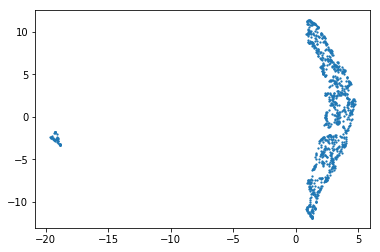

In [89]:
plt.scatter(emb[:,0], emb[:,1], s=1.5)

solar powered water heater,
gas water heater,
electric water heater - peak hours,
electric water heater - off peak hours,
gas,
natural gas,
Jet Fuel,
waste management,
hybrid,
electric - peak hours,
electric - off peak hours